## Exericise 11

### Introduction

The aim of this exercise is to fit a linear function $f(x)=2x+1$ using a single neuron neural network.
At first, the dataset for training and testing are created:
1. *training set*: measures used to train the model and optimize regression parameters. Points in this set are obtained by adding a gaussian noise to the linear target function,
2. *validation set* (10% of the training set): to test the model accuracy on a separate set not involved in the training process. Like the training set, this is evaluated from linear target function + gaussian noise with same $\sigma$ as in the training set,
3. *target set*: the actual target function without the gaussian noise. The model accuracy is evaluated on this set as well.

The following graph reports the three dataset as an example, using 100 points for the training set, 10 points for the validation and target set (the latter is represented as a straight line, the other two as scatterplots).

In [2]:
### importing libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

In [3]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [5]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

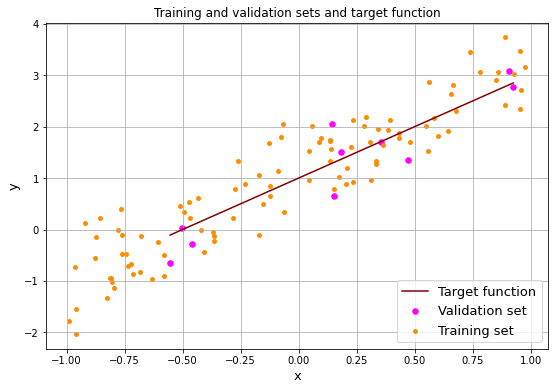

In [6]:
# plot training and target dataset (sigma = 0.5)
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
plt.plot(x_valid, y_target, color = "maroon", label = "Target function")
plt.scatter(x_valid, y_valid, color='magenta', s=30, label="Validation set")
plt.scatter(x_train, y_train, color = "darkorange", s=15, label="Training set")
plt.xlabel("x",size=13)
plt.ylabel("y",size=13)
plt.title("Training and validation sets and target function")
plt.legend(loc="lower right", fontsize=13)
plt.grid(True); plt.show()

### 10.1
This first part of Lecture 11 focuses on three parameters: $N_{train}$ (the training set size), $\sigma$ (the gaussian noise standard deviation applied on the training and validation sets), $N_{epochs}$ (an epoch is a single run of the NN during the training phase). The mean sqaured error was used as loss function in the whole exercise.

At first these parameters were set to: $N_{train} = 100$, $\sigma=0$, $N_{epochs}=30$. With this parameters setting, the loss function evaluated on the validation set resulted to be $\approx 0.3$. After that, the training set size $N_{train}$, $\sigma$ and the number of epochs $N_{epochs}$ were varied to see how the model is related to these parameters and to improve the fitting. The script was simply run several times varying manually $N_{train}$, $\sigma$ and $N_{epochs}$ to find the best combination of the three parameters. Loss function on the validation and on the target set were taken into account to evaluate the fitting (loss function on the validation data was considered as well in order to avoid overfitting).

**Varying $\sigma$**: $ \ \ \ $ ($N_{epochs}=40$, $N_{train}=100$)

|sigma|predicted m|predicted b|loss on validation set|loss on target set|
|---|---|---|---|---|
|0.1|1.9332693|1.005875|0.010002939961850643|0.0011858774814754725|
|0.3|2.0103765|1.0422844|0.07495731115341187|0.001961078029125929|
|0.5|2.0715578|1.0032238|0.15864932537078857|0.001555219292640686|
|0.7|1.975122|0.86201894|0.4242778718471527|0.020328989252448082|
|0.9|2.0787158|0.9541927|0.8266009092330933|0.0027085761539638042|
|1.3|1.9195483|0.6753314|0.862949013710022|0.11573337018489838|

As expected, the loss function increases with $\sigma$ (the more the training data are spread, the more difficult it is to evaluate m and b). However, incresing the number of epochs it is possible to reduce the loss function on the target set (loss on validation set doesn't improve, this may be due to the fact that the validation set is spread as well).

$ \\ $

**Varying $N_{train}$**: $ \ \ \ $   ($N_{epochs}=40$, $\sigma=0.3$, $batch = 32$, validation set size always 10% of the training set size)

|training set size|predicted m|predicted b|loss on validation set| loss on target set|
|---|---|---|---|---|
|70|2.0668828|1.028657|0.11259597539901733|0.0034668243024498224|
|120|2.103306|1.0182844|0.09926555305719376|0.0027775231283158064|
|200|2.0409226|0.9646509|0.10246913135051727|0.0020201418083161116|
|500|2.0328834|0.97006744|0.09979042828083039|0.0013439443736569957|
|1000|2.0022569|1.0069656|0.07386541679501533|4.926809080643579e-05|

In general, predctions seem to improve increaing $N_{train}$, even if the loss function on the validation/target seem to depend more on $\sigma$ rather than $N_{train}$.

$ \\ $

**Varying $N_{epochs}$**: $ \ \ \ $   ($N_{train}= 500 $, $\sigma=0.3$, $batch = 32$, validation set size always 10% of the training set size)

|# epochs|predicted m|predicted b|loss on validation set| loss on target set|
|---|---|---|---|---|
|50|2.031459|0.96656036|0.10073151409626008|0.0015440493111964315|
|60|2.0192769|0.97956055|0.0599472776055336|0.000577559914381709|
|75|2.0210502|1.0103799|0.0705984503030777|0.0002262158808298409|
|100|1.9751853|0.9959381|0.08684590220451355|0.00020237264805473388|
|200|1.9968362|0.9857125|0.09561826169490814|0.00020259216660633683|

While the loss function on the target set decreases with $N_{epochs}$, the loss on the validation turns out to be higher for $N_{epochs} > \approx 60$. This could be due to overfitting. As a consequence, in the rest of the exercise the parameters were set to: $\sigma = 0.3$, $N_{train} = 500$, $N_{epochs}=60$. The graph below shows the result obtained with these parameters.

In [18]:
#compose the NN model
model = tf.keras.Sequential()
## one layer with one input
model.add(Dense(1, input_shape=(1,)))
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [20]:
np.random.seed(0)
# generate training inputs
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.3 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)
    
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=60,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 500 samples, validate on 50 samples
Epoch 1/60
500/500 [==============================] - 1s 2ms/sample - loss: 2.3349 - mse: 2.3349 - val_loss: 1.8961 - val_mse: 1.8961
Epoch 2/60
500/500 [==============================] - 0s 312us/sample - loss: 1.7069 - mse: 1.7069 - val_loss: 1.4105 - val_mse: 1.4105
Epoch 3/60
500/500 [==============================] - 0s 273us/sample - loss: 1.2893 - mse: 1.2893 - val_loss: 1.0856 - val_mse: 1.0856
Epoch 4/60
500/500 [==============================] - 0s 327us/sample - loss: 1.0042 - mse: 1.0042 - val_loss: 0.8542 - val_mse: 0.8542
Epoch 5/60
500/500 [==============================] - 0s 276us/sample - loss: 0.7983 - mse: 0.7983 - val_loss: 0.6847 - val_mse: 0.6847
Epoch 6/60
500/500 [==============================] - 0s 298us/sample - loss: 0.6446 - mse: 0.6446 - val_loss: 0.5556 - val_mse: 0.5556
Epoch 7/60
500/500 [==============================] - 0s 346us/sample - loss: 0.5271 - mse: 0.5271 - val_loss: 0.4577 - val_mse: 0.4577
Epoch

500/500 [==============================] - 0s 298us/sample - loss: 0.0881 - mse: 0.0881 - val_loss: 0.1007 - val_mse: 0.1007


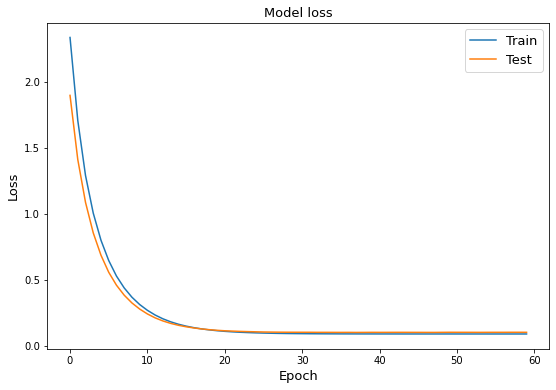

In [21]:
##-> 60 epoche, sigma 0.3,  ntrain = 500
plt.figure(figsize=(9,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss',size=13)
plt.ylabel('Loss',size=13)
plt.xlabel('Epoch',size=13)
plt.legend(['Train', 'Test'], loc='best',fontsize=13)
plt.show()

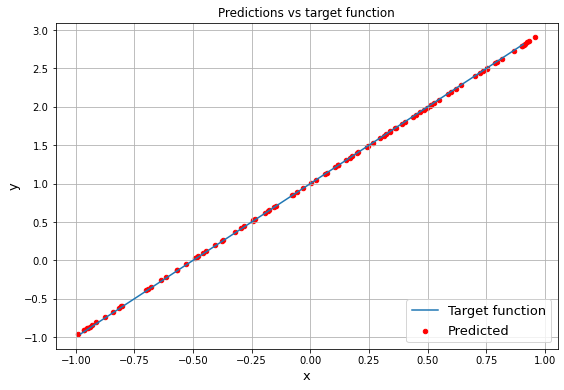

In [42]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

plt.figure(figsize=(9,6))
plt.scatter(x_predicted, y_predicted, color = "r",s=20, label = "Predicted")
plt.plot(x_valid, y_target, label = "Target function")
plt.xlabel("x",size=13)
plt.ylabel("y",size=13)
plt.title("Predictions vs target function")
plt.legend(loc="lower right", fontsize=13)
plt.grid(True); plt.show()